In [1]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [2]:
%%html
<div id="toc"></div>

In [3]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [4]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [5]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [6]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [7]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [8]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [9]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Sun Sep 13 13:13:47 2020 +0200**

In [10]:
plt.rcParams['figure.figsize'] = [20, 7]

In [11]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='both', length=14)
    #ax.locator_params(axis='x', nbins=10)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [12]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [13]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data['CASI PER TAMPONE (%)']= (incremental_data['totale_casi']/incremental_data['tamponi']*100).round(2)

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [14]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
12-Sep-20         1501             736      759         6          109   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  \
                                                                             
12-Sep-20         102             7            627            736    92706   

           CASI PER TAMPONE (%)  
                                 
12-Sep-20                  1.62

### I dati cumulati di oggi

In [15]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
12-Sep-20       286297          37503   213191     35603         2133   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
12-Sep-20        1951           182          35370  9745975

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

TypeError: can only concatenate str (not "int") to str

Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exc

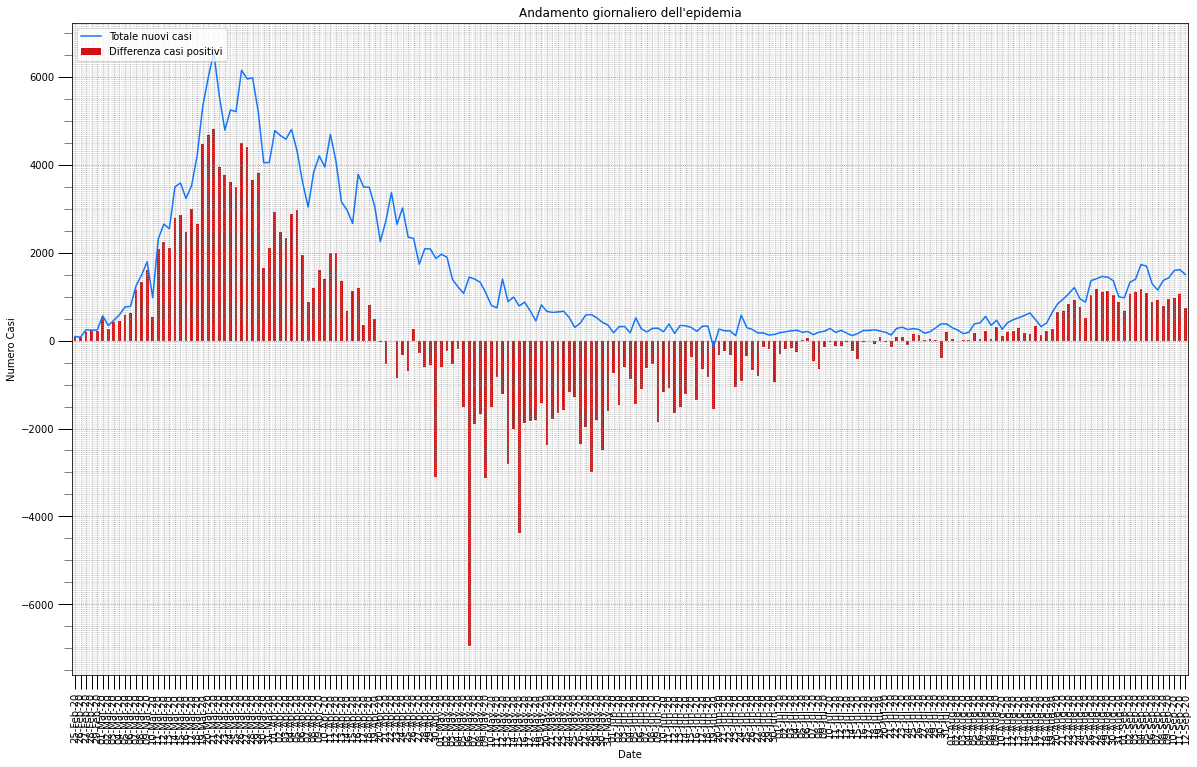

In [61]:
plt.rcParams['figure.figsize'] = [20, 12]
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)


plot =['nuovi_attualmente_positivi']
legends = ["Differenza casi positivi"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends,  ax=ax)
beautify_graph(ay)


plot =['deceduti']
legends = ["Deceduti"]
colors = [COL_DECEDUTI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)

ax.set_ylabel('Numero Casi')
beautify_graph(ax)

plot =['dimessi_guariti']
legends = ["Guariti"]
colors = [COL_GUARITI, ]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, ax=ax)
ay.set_title("Andamento giornaliero guariti e deceduti")
beautify_graph(ay)

#legends = ["Totale ospedalizzati"]
#colors = [COL_TOT_RICOVERATI]
#aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Andamento giornalie della tipologia di decorso")
az.set_ylabel('Numero Casi')
beautify_graph(az)



#### I dati incrementali degli ultimi 10 giorni

In [17]:

show_table(incremental_data.rename(columns=NAME_LABELS),10).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
03-Sep-20         1397            1098      289        10           79   
04-Sep-20         1732            1184      537        11          103   
05-Sep-20         1693            1095      583        15           13   
06-Sep-20         1297             884      405         8           75   
07-Sep-20         1150             915      223        12           45   
08-Sep-20         1369             796      563        10           42   
09-Sep-20         1430             945      471        14           25   
10-Sep-20         1597             974      613        10           72   
11-Sep-20         1616            1059      547        10           24   
12-Sep-20         1501             736      759         6          109   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  \
                                                              
03-Sep-20          68            11           1019    92790   
04-Sep-20         102             1           1081   113085   
05-Sep-20          13             0           1082   107658   
06-Sep-20          63            12            809    76856   
07-Sep-20          36             9            870    52553   
08-Sep-20          41             1            754    92403   
09-Sep-20          18             7            920    95990   
10-Sep-20          58            14            902    94186   
11-Sep-20          13            11           1035    98880   
12-Sep-20         102             7            627    92706   

           CASI PER TAMPONE (%)  
                                 
03-Sep-20                  1.51  
04-Sep-20                  1.53  
05-Sep-20                  1.57  
06-Sep-20                  1.69  
07-Sep-20                  2.19  
08-Sep-20                  1.48  
09-Sep-20                  1.49  
10-Sep-20                  1.70  
11-Sep-20                  1.63  
12-Sep-20                  1.62

#### I dati cumulati degli ultimi 10 giorni

In [18]:
show_table(national_trend.rename(columns = NAME_LABELS),10).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
03-Sep-20       272912          28915   208490     35507         1625   
04-Sep-20       274644          30099   209027     35518         1728   
05-Sep-20       276337          31194   209610     35533         1741   
06-Sep-20       277634          32078   210015     35541         1816   
07-Sep-20       278784          32993   210238     35553         1861   
08-Sep-20       280153          33789   210801     35563         1903   
09-Sep-20       281583          34734   211272     35577         1928   
10-Sep-20       283180          35708   211885     35587         2000   
11-Sep-20       284796          36767   212432     35597         2024   
12-Sep-20       286297          37503   213191     35603         2133   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
03-Sep-20        1505           120          27290  8921658  
04-Sep-20        1607           121          28371  9034743  
05-Sep-20        1620           121          29453  9142401  
06-Sep-20        1683           133          30262  9219257  
07-Sep-20        1719           142          31132  9271810  
08-Sep-20        1760           143          31886  9364213  
09-Sep-20        1778           150          32806  9460203  
10-Sep-20        1836           164          33708  9554389  
11-Sep-20        1849           175          34743  9653269  
12-Sep-20        1951           182          35370  9745975

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

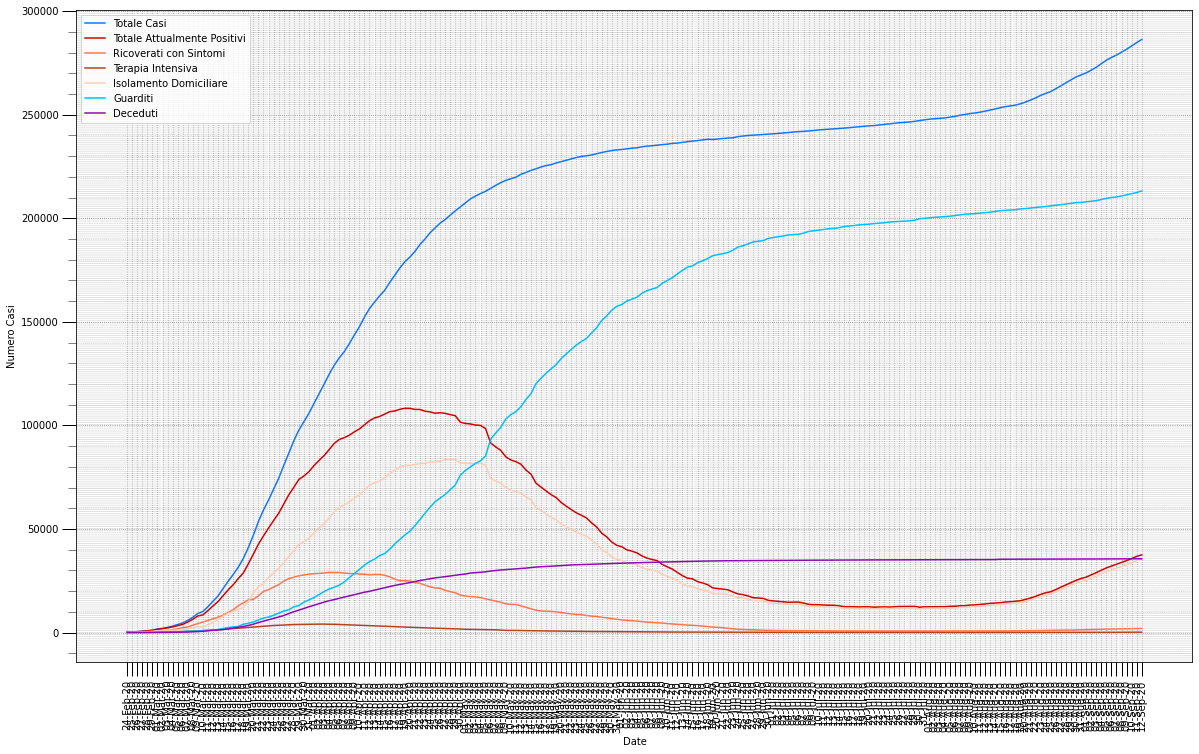

In [19]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

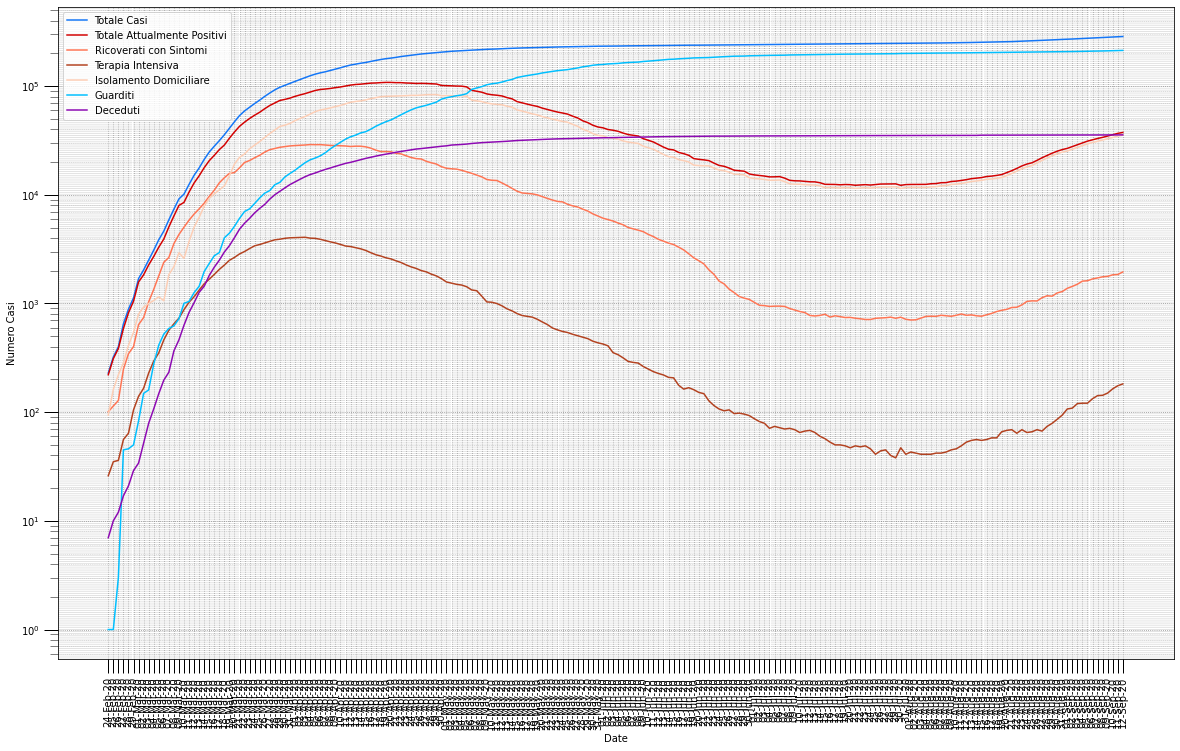

In [20]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)


### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [21]:
plt.rcParams['figure.figsize'] = [20, 7]
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/abs(national_trend[c].shift(1))*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [22]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
06-Sep-20         0.47          -19.27           2.83     0.19      0.02   
07-Sep-20         0.41            3.51           2.85     0.11      0.03   
08-Sep-20         0.49          -13.01           2.41     0.27      0.03   
09-Sep-20         0.51           18.72           2.80     0.22      0.04   
10-Sep-20         0.57            3.07           2.80     0.29      0.03   
11-Sep-20         0.57            8.73           2.97     0.26      0.03   
12-Sep-20         0.53          -30.50           2.00     0.36      0.02   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
06-Sep-20         4.31        3.89          9.92           2.75     0.84  
07-Sep-20         2.48        2.14          6.77           2.87     0.57  
08-Sep-20         2.26        2.39          0.70           2.42     1.00  
09-Sep-20         1.31        1.02          4.90           2.89     1.03  
10-Sep-20         3.73        3.26          9.33           2.75     1.00  
11-Sep-20         1.20        0.71          6.71           3.07     1.03  
12-Sep-20         5.39        5.52          4.00           1.80     0.96

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [23]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/abs(avg_trend['attualmente_positivi']).shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [24]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
08-Sep-20       280153   0.49           0.52                  33789   2.41   
09-Sep-20       281583   0.51           0.52                  34734   2.80   
10-Sep-20       283180   0.57           0.53                  35708   2.80   
11-Sep-20       284796   0.57           0.52                  36767   2.97   
12-Sep-20       286297   0.53           0.51                  37503   2.00   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
08-Sep-20           3.39   210801   0.27           0.20        10   0.03   
09-Sep-20           3.22   211272   0.22           0.21        14   0.04   
10-Sep-20           3.06   211885   0.29           0.23        10   0.03   
11-Sep-20           2.90   212432   0.26           0.23        10   0.03   
12-Sep-20           2.67   213191   0.36           0.24         6   0.02   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
08-Sep-20           0.03    92403   1.00           1.01  
09-Sep-20           0.03    95990   1.03           0.99  
10-Sep-20           0.03    94186   1.00           0.99  
11-Sep-20           0.03    98880   1.03           0.95  
12-Sep-20           0.03    92706   0.96           0.92

Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exc

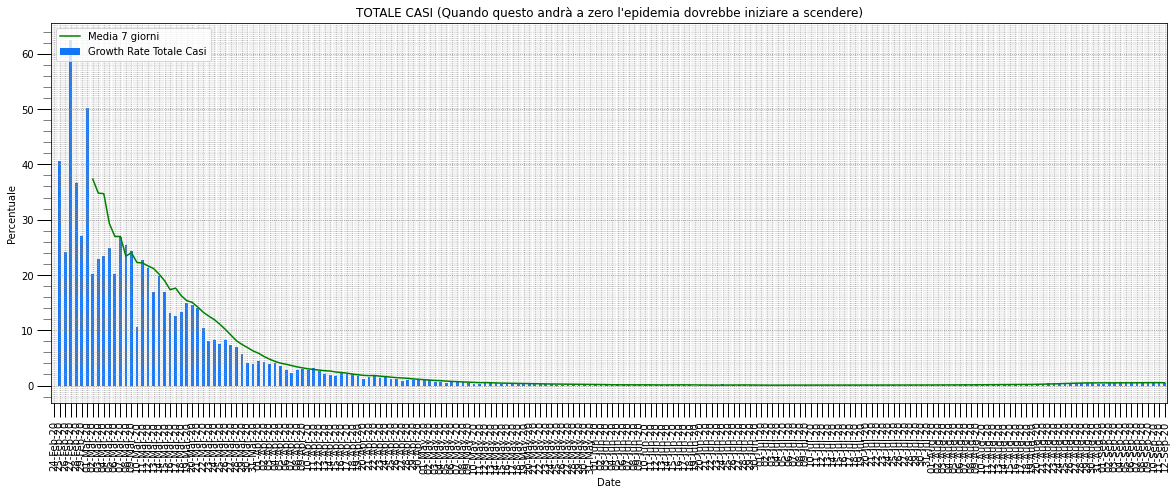

In [25]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exc

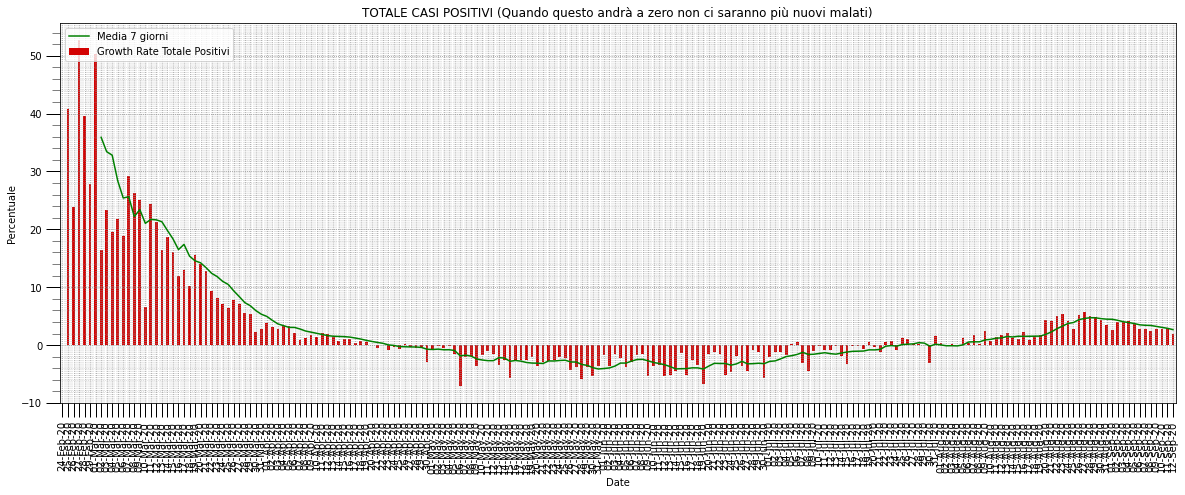

In [26]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exc

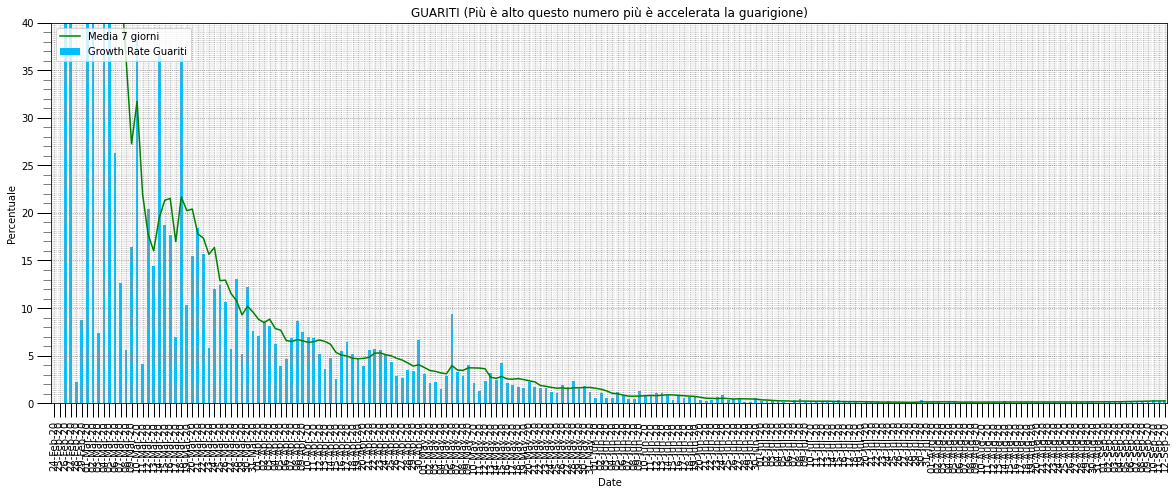

In [27]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1011 ticks ([-0.4, ..., 201.6]), which exc

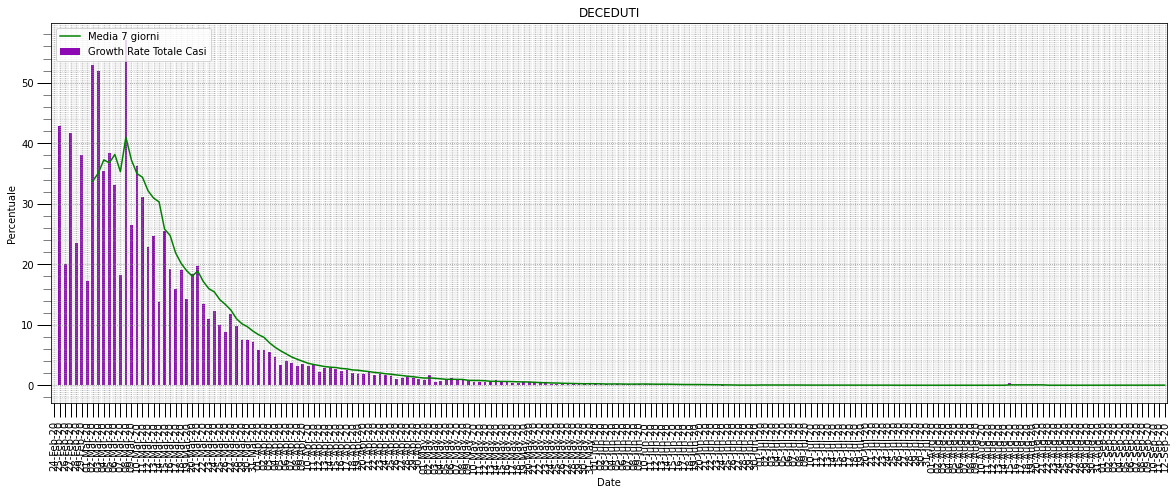

In [28]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 1 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di 1 indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a 1 indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno). Una fattore uguale a zero significa che è stabile. 

In [29]:
max_tamponi = incremental_data['tamponi'].max()


In [30]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / abs(gf['diff'].shift(1)))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf_15'] = gf['gr'].rolling(15).mean().round(3)


gf['tamponi'] =national_trend['tamponi']
gf['diff_tamp'] =national_trend['tamponi']-national_trend['tamponi'].shift(1)
gf['totale_casi'].shift(1) * max_tamponi /(national_trend['tamponi'].shift(1) -national_trend['tamponi'].shift(2))
gf['gr_tamp'] = ((gf['diff_tamp'] / abs(gf['diff_tamp'].shift(1)))).round(3)
gf['avg_gf_tamp'] = gf['gr_tamp'].rolling(7).mean().round(3)
gf['avg_gf_tamp_15'] = gf['gr_tamp'].rolling(15).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)

gf['gr_att_pos'] = ((gf['diff_att_pos'] / abs(gf['diff_att_pos'].shift(1)))).round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)
gf['avg_att_pos_15'] = gf['gr_att_pos'].rolling(15).mean().round(3)


show_table(gf, 7)\
    .drop('diff', axis=1)\
    .drop('diff_tamp', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR NUOVI', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'avg_gf_15': 'MEDIA 15GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'avg_att_pos_15': 'MEDIA 15GG',
        'gr_tamp': 'GROWTH FACTOR TAMPONI',
        'avg_gf_tamp_15': 'MEDIA 15GG',
        'avg_gf_tamp': 'MEDIA 7GG'
       })


CASI TOTALI  GROWTH FACTOR NUOVI  MEDIA 7GG  MEDIA 15GG  TAMPONI  \
                                                                              
06-Sep-20       277634                0.766      1.015       1.033  9219257   
07-Sep-20       278784                0.887      1.038       1.017  9271810   
08-Sep-20       280153                1.190      1.068       1.044  9364213   
09-Sep-20       281583                1.045      1.023       1.053  9460203   
10-Sep-20       283180                1.117      1.032       1.023  9554389   
11-Sep-20       284796                1.012      0.999       1.022  9653269   
12-Sep-20       286297                0.929      0.992       1.015  9745975   

           GROWTH FACTOR TAMPONI  MEDIA 7GG  MEDIA 15GG  TOT. POSITIVI  \
                                                                         
06-Sep-20                  0.714      1.029       1.030          32078   
07-Sep-20                  0.684      1.018       1.018          32993   
08-Sep-20                  1.758      1.071       1.090          33789   
09-Sep-20                  1.039      1.038       1.054          34734   
10-Sep-20                  0.981      1.050       1.033          35708   
11-Sep-20                  1.050      1.025       1.036          36767   
12-Sep-20                  0.938      1.023       1.030          37503   

           diff_att_pos  GROWTH FACTOR ATT. POS.  MEDIA 7GG  MEDIA 15GG  
                                                                         
06-Sep-20         884.0                    0.807      1.003       1.045  
07-Sep-20         915.0                    1.035      1.032       1.038  
08-Sep-20         796.0                    0.870      1.046       1.042  
09-Sep-20         945.0                    1.187      0.991       1.076  
10-Sep-20         974.0                    1.031      0.990       1.011  
11-Sep-20        1059.0                    1.087      0.992       1.008  
12-Sep-20         736.0                    0.695      0.959       0.992

Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]),

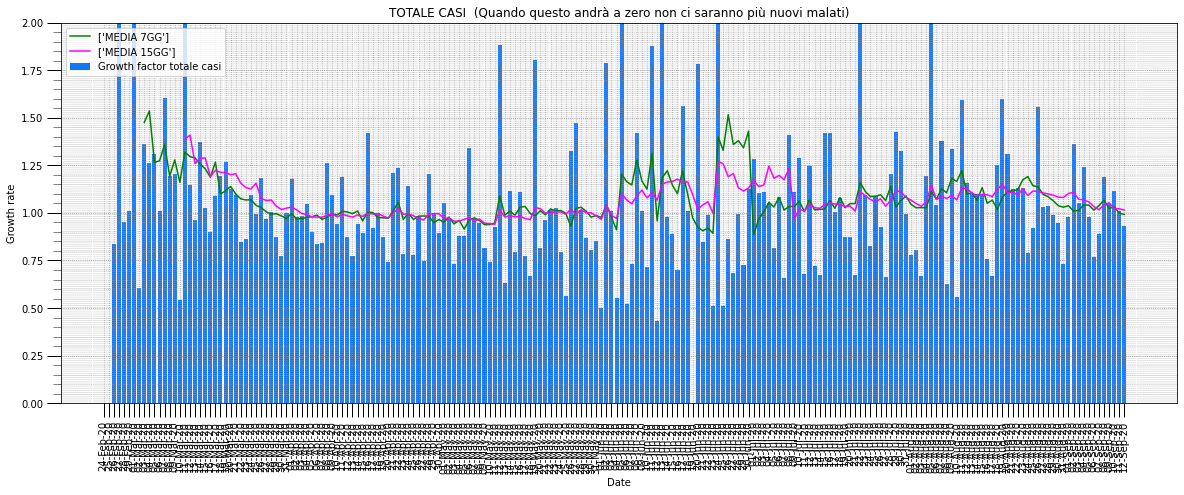

In [31]:
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor totale casi', color=COL_TOTALE_CASI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]),

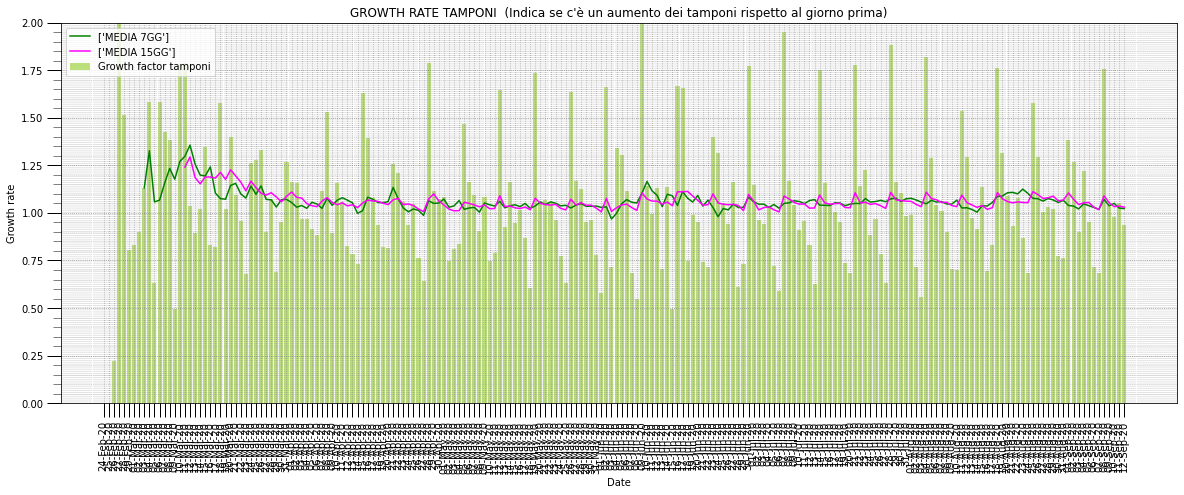

In [32]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_tamp'], label='Growth factor tamponi', color=COL_TAMPONI)
ax.plot(gf['data'], gf['avg_gf_tamp'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_tamp_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH RATE TAMPONI  (Indica se c'è un aumento dei tamponi rispetto al giorno prima)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]),

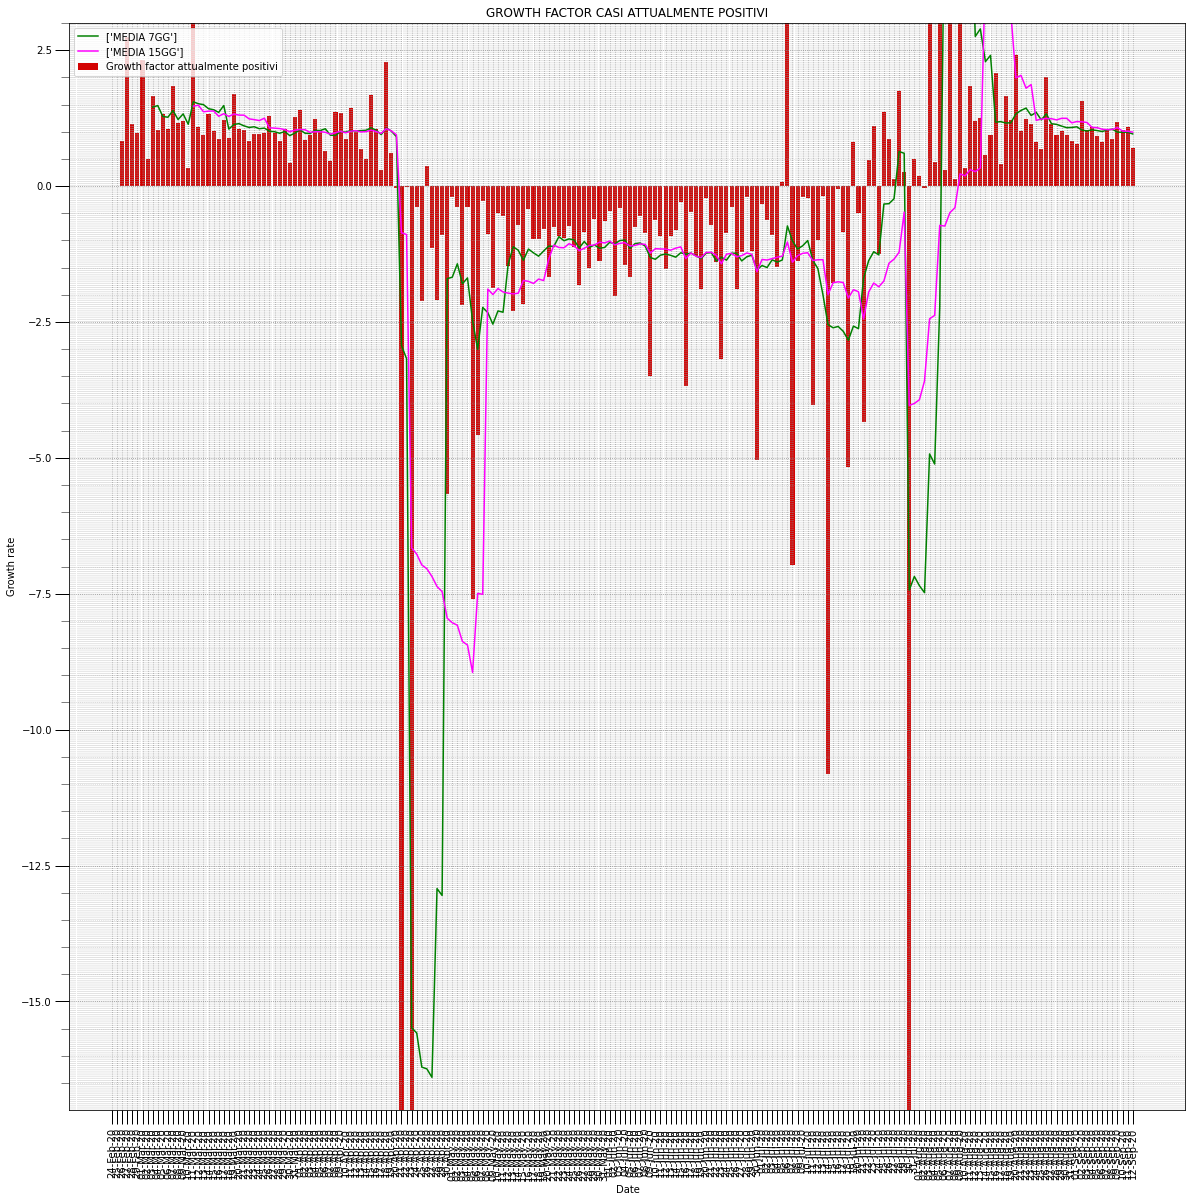

In [33]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr_att_pos'], label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ax.plot(gf['data'], gf['avg_att_pos'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_att_pos_15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-17,3)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

In [34]:
plt.rcParams['figure.figsize'] = [20, 7]

Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]),

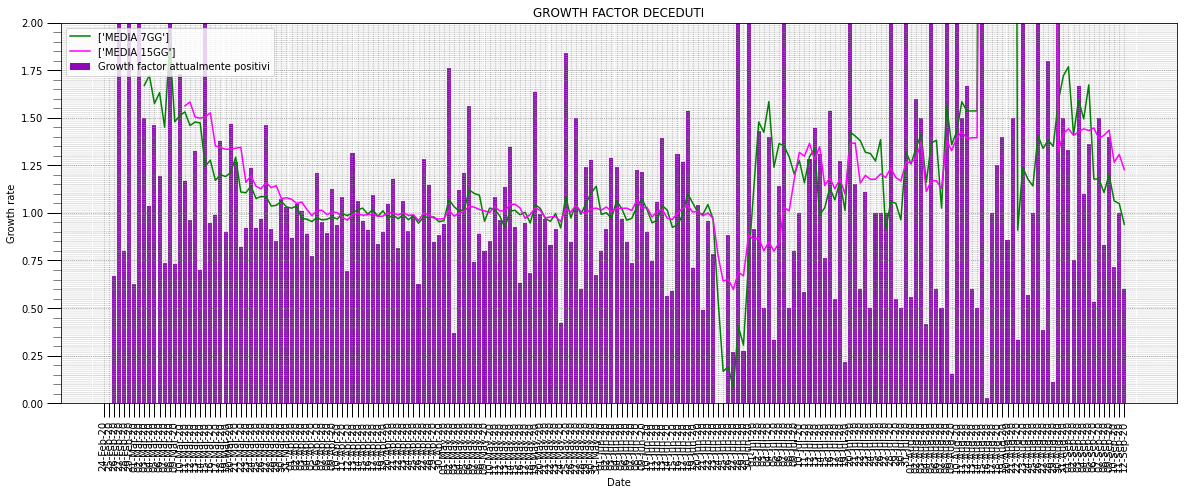

In [35]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_DECEDUTI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1098 ticks ([-8.200000000000001, ..., 211.19999999999922]),

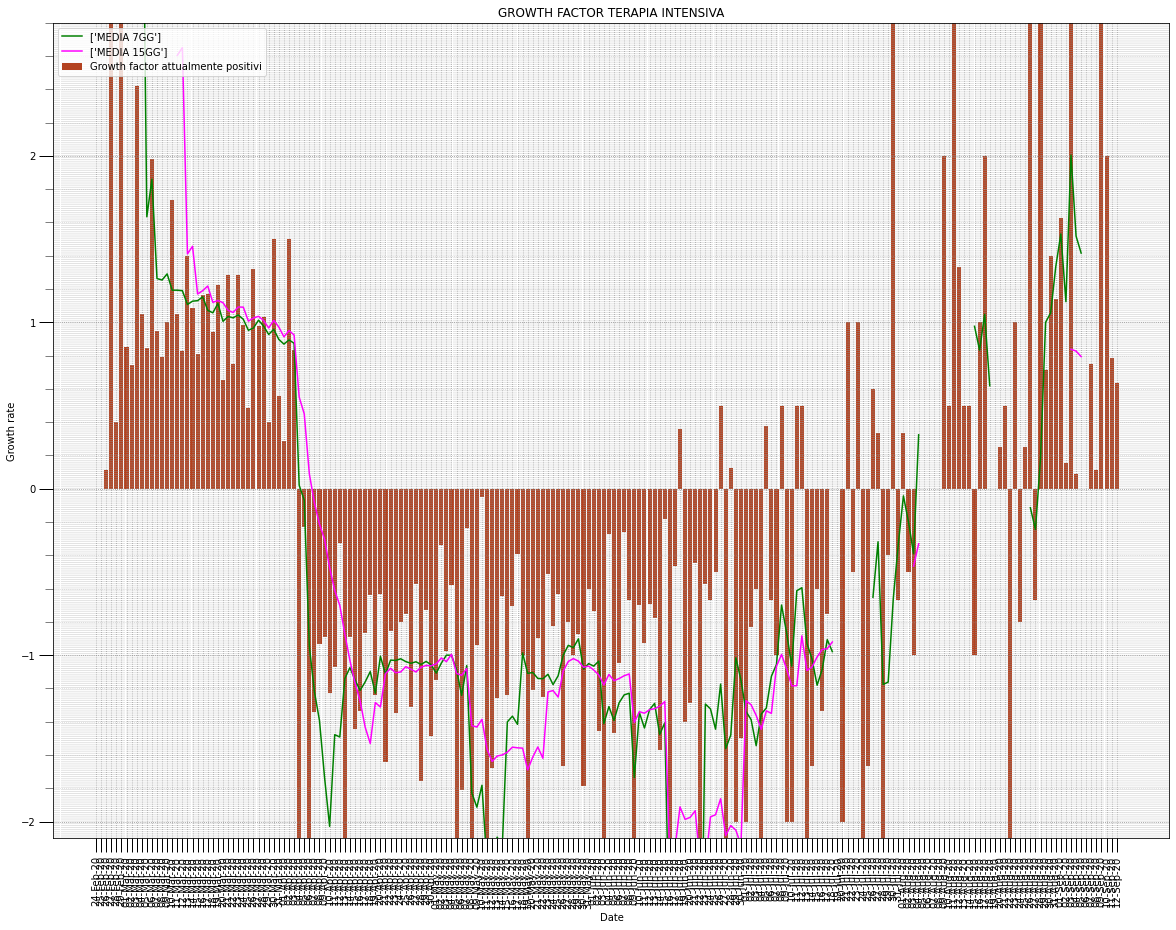

In [36]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / abs(gf['diff'].shift(1))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_TERAPIA_INTENSIVA)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-2.1,2.8)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)
plt.rcParams['figure.figsize'] = [20, 7]

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [37]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [38]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
06-Sep-20        4.86            0.93                   62.37    31.23   
07-Sep-20        3.13            0.78                   75.65    19.39   
08-Sep-20        2.99            0.07                   55.08    41.12   
09-Sep-20        1.26            0.49                   64.34    32.94   
10-Sep-20        3.63            0.88                   56.48    38.38   
11-Sep-20        0.80            0.68                   64.05    33.85   
12-Sep-20        6.80            0.47                   41.77    50.57   

           DECEDUTI  
                     
06-Sep-20      0.62  
07-Sep-20      1.04  
08-Sep-20      0.73  
09-Sep-20      0.98  
10-Sep-20      0.63  
11-Sep-20      0.62  
12-Sep-20      0.40

### Percentuali totali

In [39]:
percents_in_period.tail(10)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
03-Sep-20  03-Sep-20                    4.87               0.79   
04-Sep-20  04-Sep-20                    5.89               0.06   
05-Sep-20  05-Sep-20                    0.77               0.00   
06-Sep-20  06-Sep-20                    4.86               0.93   
07-Sep-20  07-Sep-20                    3.13               0.78   
08-Sep-20  08-Sep-20                    2.99               0.07   
09-Sep-20  09-Sep-20                    1.26               0.49   
10-Sep-20  10-Sep-20                    3.63               0.88   
11-Sep-20  11-Sep-20                    0.80               0.68   
12-Sep-20  12-Sep-20                    6.80               0.47   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
03-Sep-20                   72.94            20.69      0.72     3.29  
04-Sep-20                   62.41            31.00      0.64     7.83  
05-Sep-20                   63.91            34.44      0.89    -7.52  
06-Sep-20                   62.37            31.23      0.62   -19.27  
07-Sep-20                   75.65            19.39      1.04     3.51  
08-Sep-20                   55.08            41.12      0.73   -13.01  
09-Sep-20                   64.34            32.94      0.98    18.72  
10-Sep-20                   56.48            38.38      0.63     3.07  
11-Sep-20                   64.05            33.85      0.62     8.73  
12-Sep-20                   41.77            50.57      0.40   -30.50

In [40]:
a="""plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()

plot = ['isolamento_domiciliare','dimessi_guariti','deceduti','ricoverati_con_sintomi','terapia_intensiva']
colors = [COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI,COL_RICOVERATI, COL_TERAPIA_INTENSIVA ]
labels = ['Isolamento Domiciliare','Guariti','Deceduti','Ricoverati con sintomi','Terapia Intensiva']

for i in range(len(plot)):
    plt.bar(percents_in_period['data'], percents_in_period[plot[i]], color=colors[i],label=labels[i])

ax.set_ylim(-20,100)
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_title("PERCENTUALE GIORNALIERA")
ax.set_ylabel('Percentuale')
beautify_graph(ax)
"""

**Le percentuali dall'inizio dell'epidemia**

In [41]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [42]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
06-Sep-20        0.61            0.05                   10.90    75.64   
07-Sep-20        0.62            0.05                   11.17    75.41   
08-Sep-20        0.63            0.05                   11.38    75.24   
09-Sep-20        0.63            0.05                   11.65    75.03   
10-Sep-20        0.65            0.06                   11.90    74.82   
11-Sep-20        0.65            0.06                   12.20    74.59   
12-Sep-20        0.68            0.06                   12.35    74.46   

           DECEDUTI  
                     
06-Sep-20     12.80  
07-Sep-20     12.75  
08-Sep-20     12.69  
09-Sep-20     12.63  
10-Sep-20     12.57  
11-Sep-20     12.50  
12-Sep-20     12.44

Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1006 ticks ([-0.4, ..., 200.6]), which exc

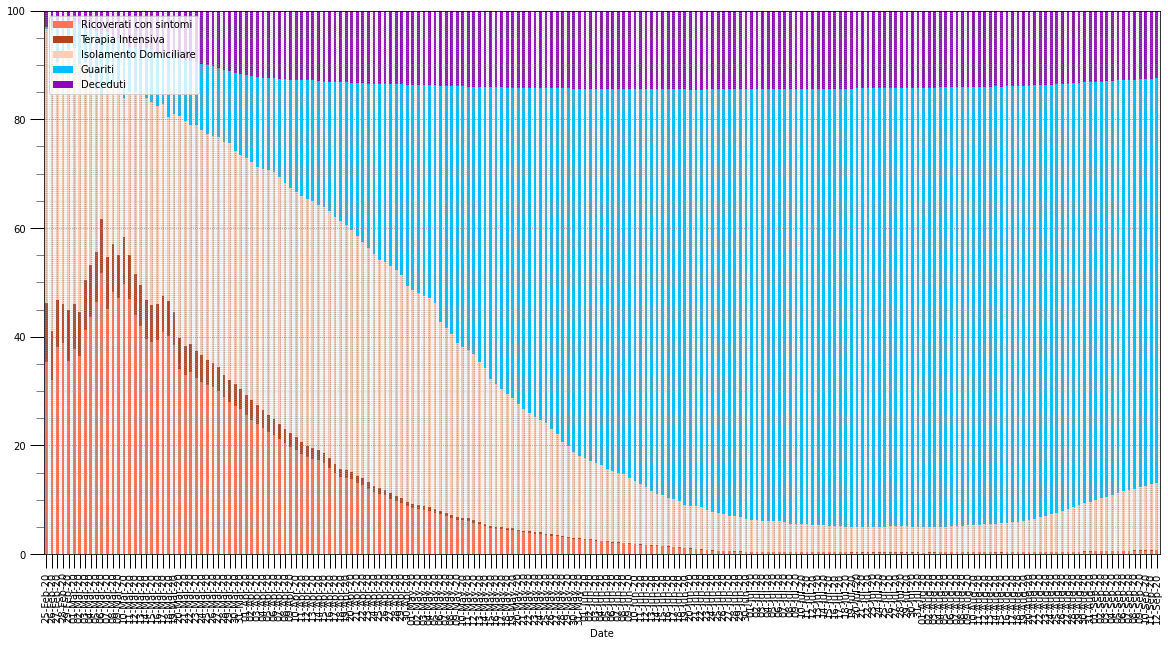

In [43]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 10]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [44]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [45]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [46]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [47]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [48]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
12-Sep-20     3978         610      1701      9003           33363   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
12-Sep-20                   4112  12980    11774     103074    7511

In [49]:
regional_datas['totale_casi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
12-Sep-20     562          3088         5492     33671    6367      2841   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
12-Sep-20     5180    13023    2042           1258   24667

### Nuovi Casi Per Regione

In [50]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [51]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
06-Sep-20       26           9        27       100             124   
07-Sep-20       15           1        17       260             132   
08-Sep-20       13           8         8       249              94   
09-Sep-20        2          14        19       203             109   
10-Sep-20       11           6         8       180             110   
11-Sep-20       35          12         8       140             152   
12-Sep-20       11           5        18       103             138   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
06-Sep-20                     20    122      111        198      20  
07-Sep-20                     11    159       59        109       6  
08-Sep-20                     12    129       64        271      15  
09-Sep-20                     54    175       51        218      19  
10-Sep-20                     39    163      114        245      40  
11-Sep-20                     34    148       82        257      41  
12-Sep-20                     39    155      112        269      27

In [52]:

incremental_data_regional.iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
06-Sep-20       2             7           33        56      60        19   
07-Sep-20       9             0           17        37      43        59   
08-Sep-20       3             4            3        42     143        51   
09-Sep-20       4            10            7       112      97        47   
10-Sep-20       3            20           82        74      70        63   
11-Sep-20       4            26           29        57      82        65   
12-Sep-20       3            25           22        93      76        51   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
06-Sep-20       37      122      25              0     179  
07-Sep-20       49       85      13              0      69  
08-Sep-20       84       59       7              5     105  
09-Sep-20       77       88      33              0      91  
10-Sep-20      106       92      24              0     147  
11-Sep-20      104      147      17              3     173  
12-Sep-20       44      138      33              1     138

### Totale Attualmente Positivi per Regione

In [53]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
12-Sep-20      544         155       388      3898            3827   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
12-Sep-20                    586   4621     1088       8567     486

In [54]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
12-Sep-20      90           266          437      2030    1599      1379   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
12-Sep-20     1747     2402     419             34    2940

### Nuovi Positivi per Regione

In [55]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
06-Sep-20       26           8        24        98             119   
07-Sep-20       11          -4         6       248             123   
08-Sep-20        3           6         1       225              39   
09-Sep-20      -17          13         6       179              22   
10-Sep-20        6           5         8       148              57   
11-Sep-20       29          11         0       123             119   
12-Sep-20        3           1        18        33              97   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
06-Sep-20                     14    106       61        109      16  
07-Sep-20                      3    122       55         79       2  
08-Sep-20                     11     89       37        111      10  
09-Sep-20                     38    146       47        103      13  
10-Sep-20                     35    112       34        128      29  
11-Sep-20                     16     94       53        139      27  
12-Sep-20                     24    145       94        -24      20

In [56]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
06-Sep-20       2             0           22        42      45        15   
07-Sep-20       9            -3           17        25      30        57   
08-Sep-20       2             3            2        17     124        51   
09-Sep-20       4             5            3        95      93        40   
10-Sep-20       3            16           78        54      56        53   
11-Sep-20      -7            16           24        42      76        51   
12-Sep-20       2            11           15        70      53        42   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
06-Sep-20       -9      105      19              0      62  
07-Sep-20       45       76      10              0       4  
08-Sep-20       75        9       5              5     -29  
09-Sep-20       73       62       2             -5      23  
10-Sep-20       76       73      17             -3     -11  
11-Sep-20      103       98       5              2      38  
12-Sep-20       41       90      24              1     -24

### Terapia intensiva

In [57]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
06-Sep-20        2           1         0         7              14   
07-Sep-20        2           1         1         7              18   
08-Sep-20        2           1         1         9              16   
09-Sep-20        2           1         2        10              16   
10-Sep-20        3           1         3        10              17   
11-Sep-20        4           1         3        13              18   
12-Sep-20        3           1         3        17              17   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
06-Sep-20                      4     10        9         25       1  
07-Sep-20                      4      9       10         26       1  
08-Sep-20                      4      9       11         27       1  
09-Sep-20                      3      9       11         27       2  
10-Sep-20                      3      9       11         30       2  
11-Sep-20                      3     14       12         27       2  
12-Sep-20                      2     16       11         27       2

In [58]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
06-Sep-20       0             2            0         8       7         8   
07-Sep-20       0             2            0         8       6        10   
08-Sep-20       0             0            0         9       7        10   
09-Sep-20       0             0            0         9       6        12   
10-Sep-20       0             0            0         9       8        12   
11-Sep-20       0             0            0         9       8        12   
12-Sep-20       0             0            0         9       8        14   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
06-Sep-20       13        8       2              0      12  
07-Sep-20       13        9       2              0      13  
08-Sep-20       13        9       2              0      12  
09-Sep-20       15       11       2              0      12  
10-Sep-20       18       13       3              0      12  
11-Sep-20       17       17       4              0      11  
12-Sep-20       18       18       4              0      12

## Andamento per regione

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

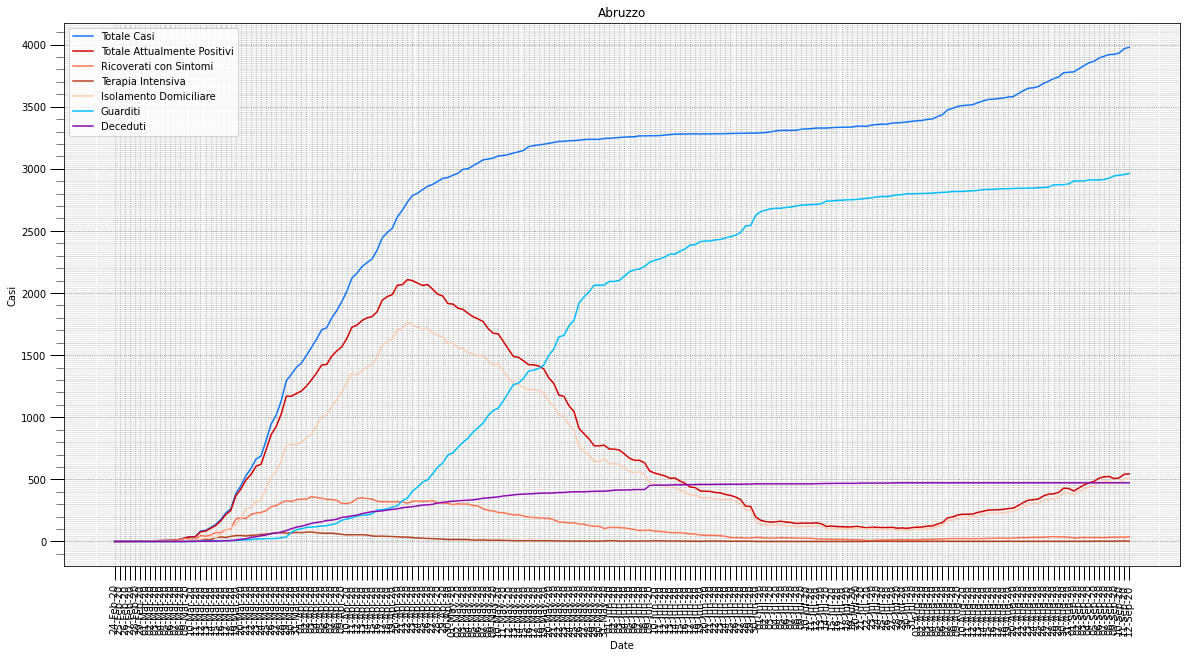

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

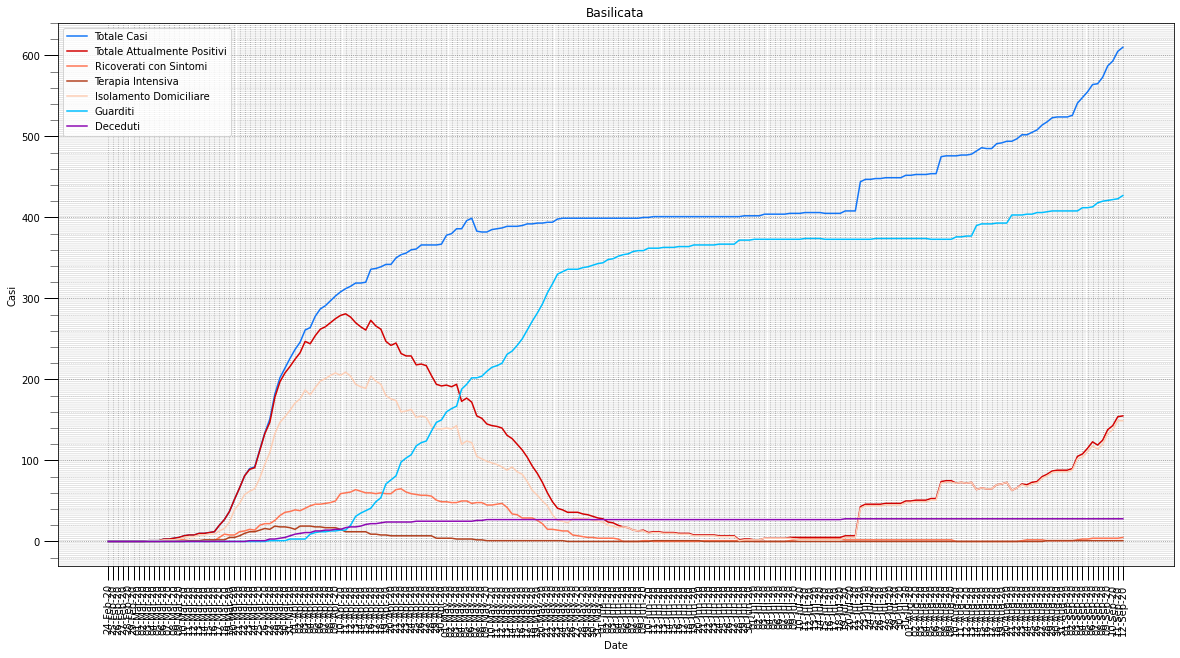

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

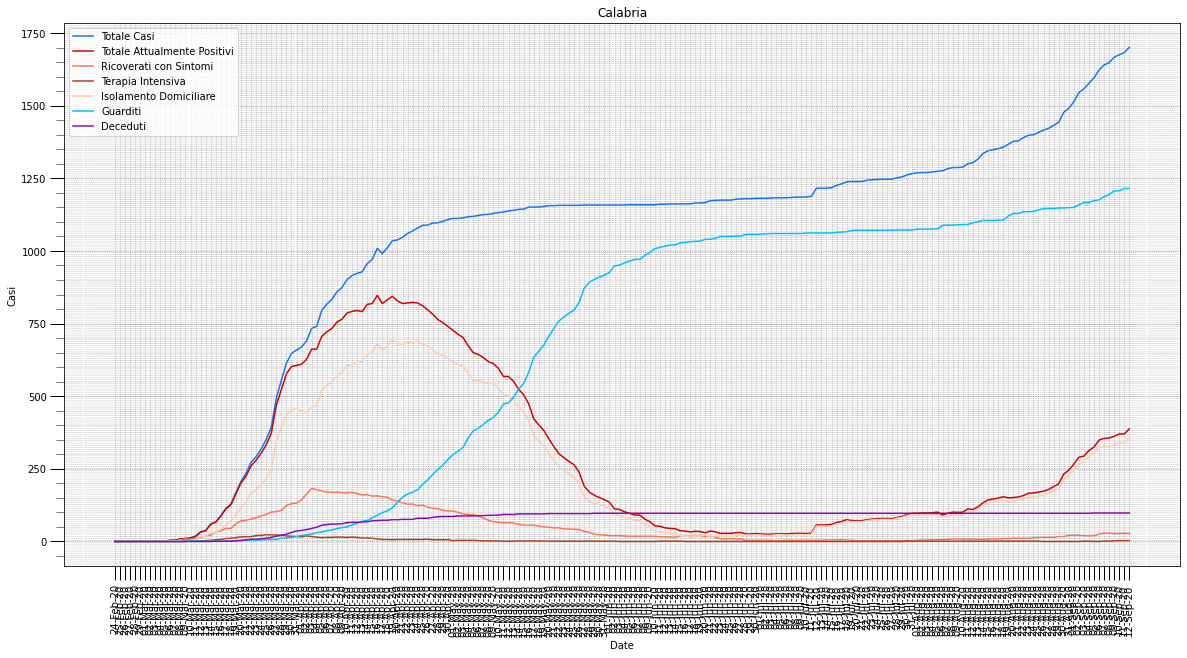

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

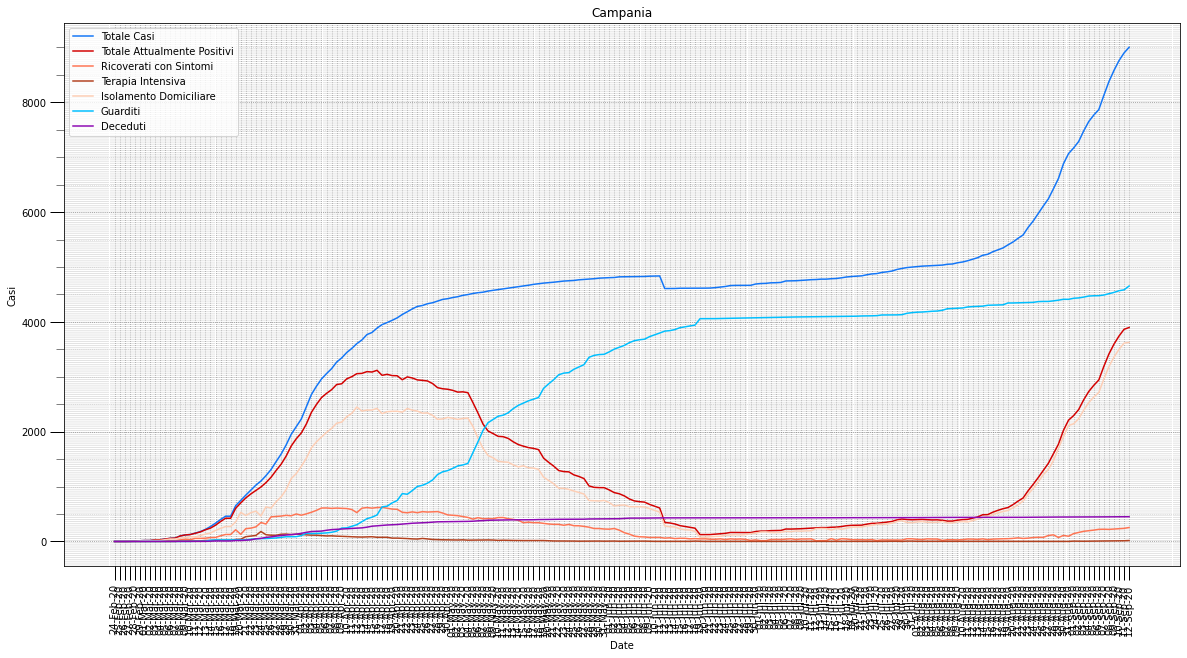

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

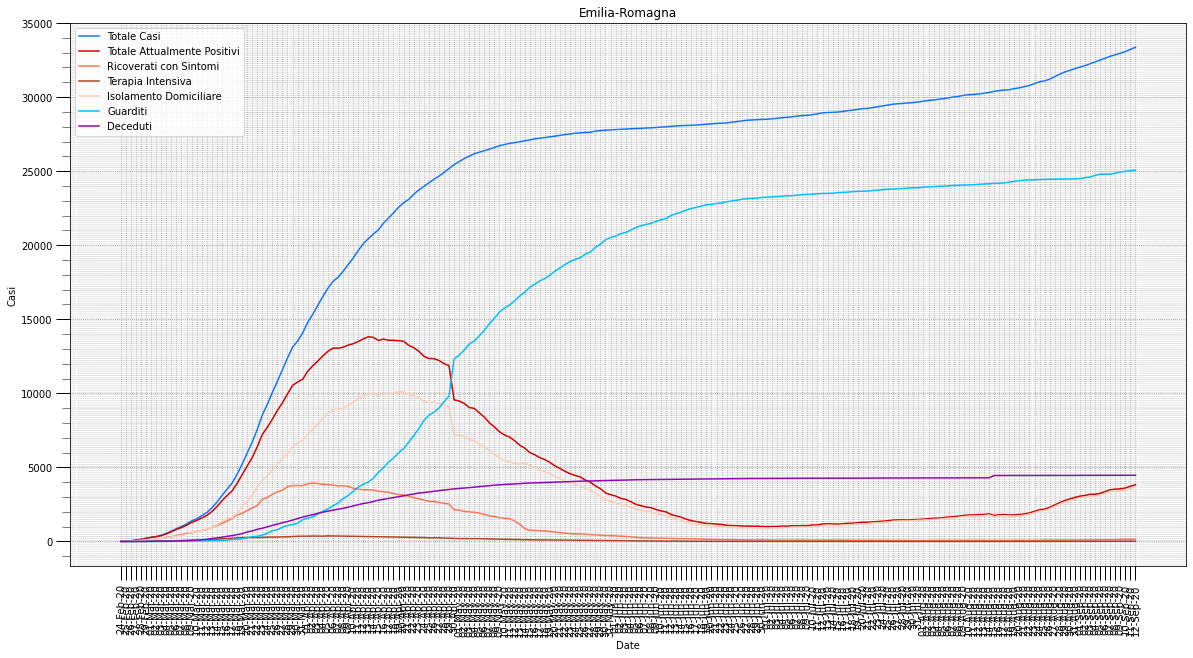

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

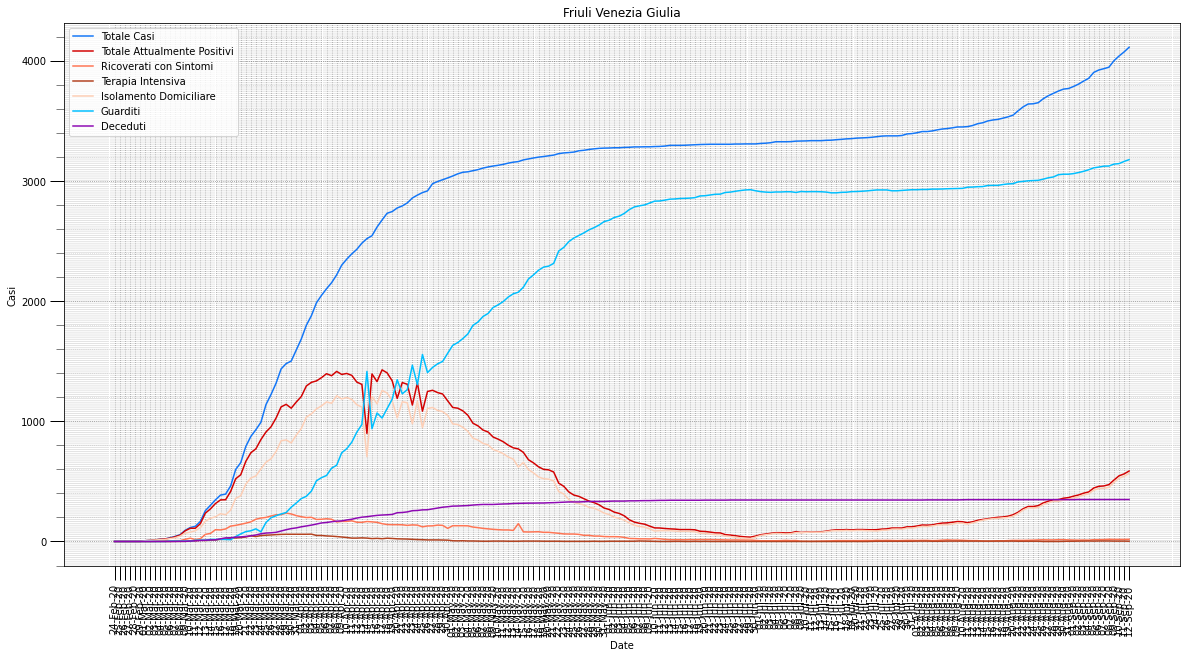

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

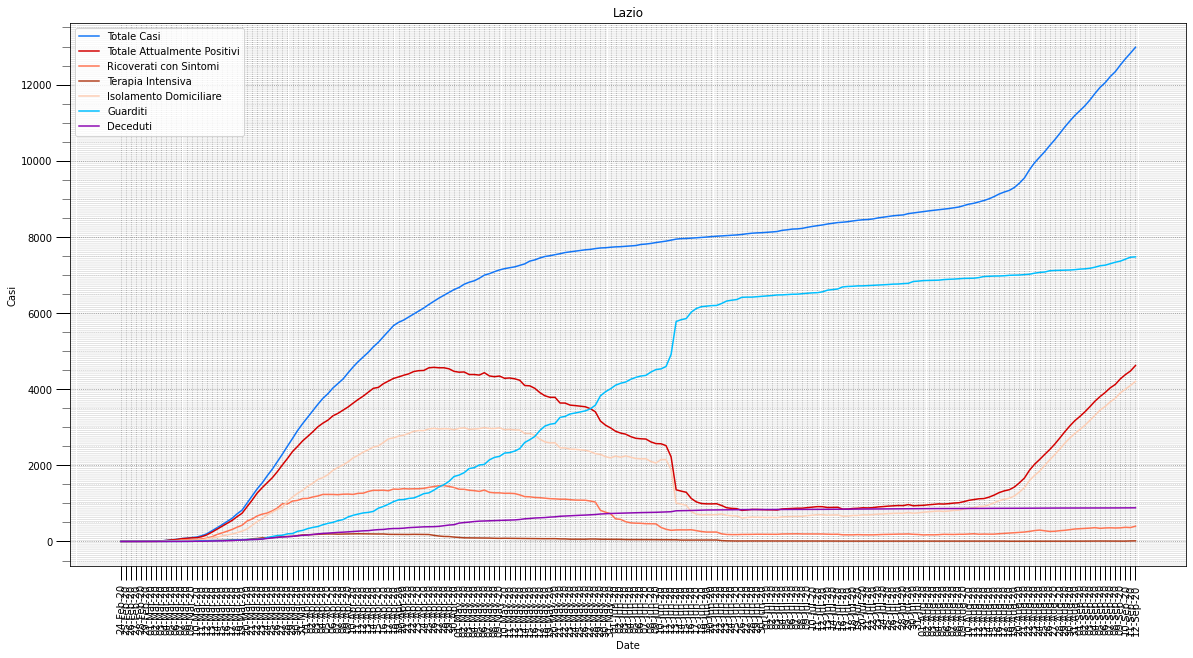

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

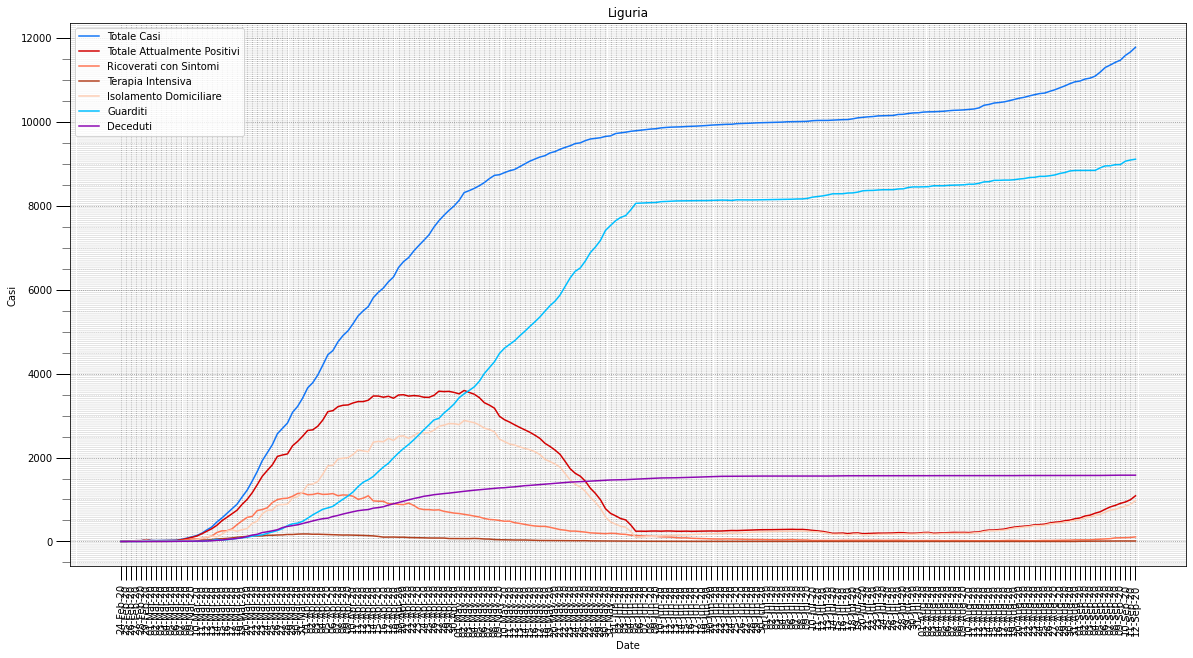

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

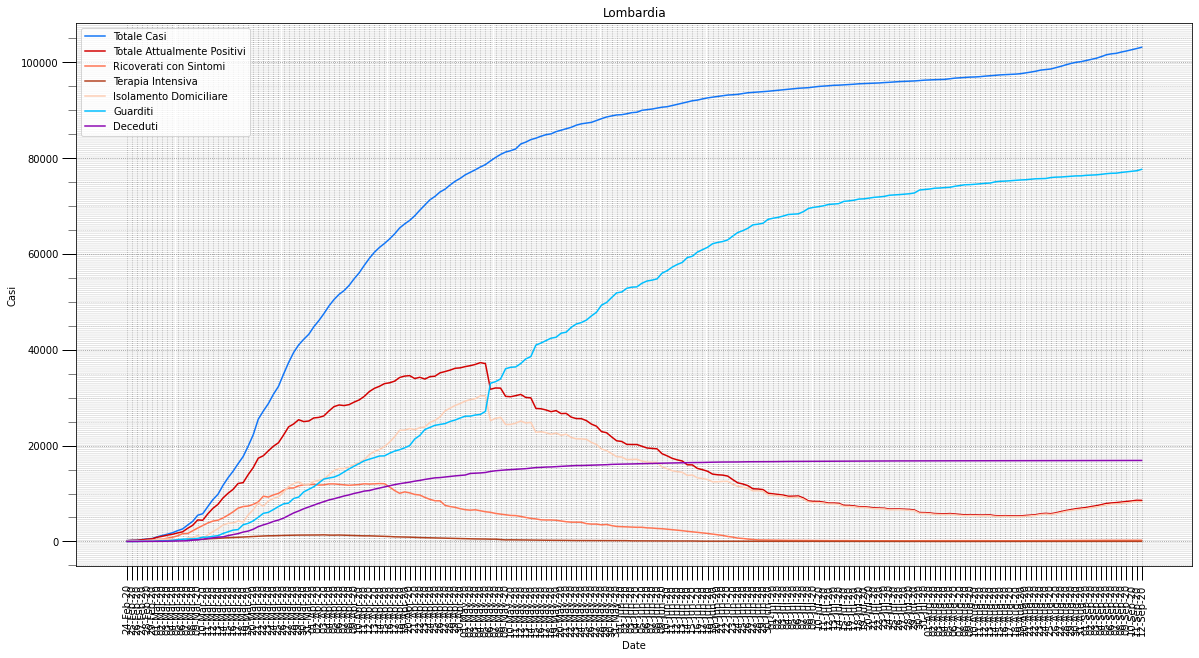

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

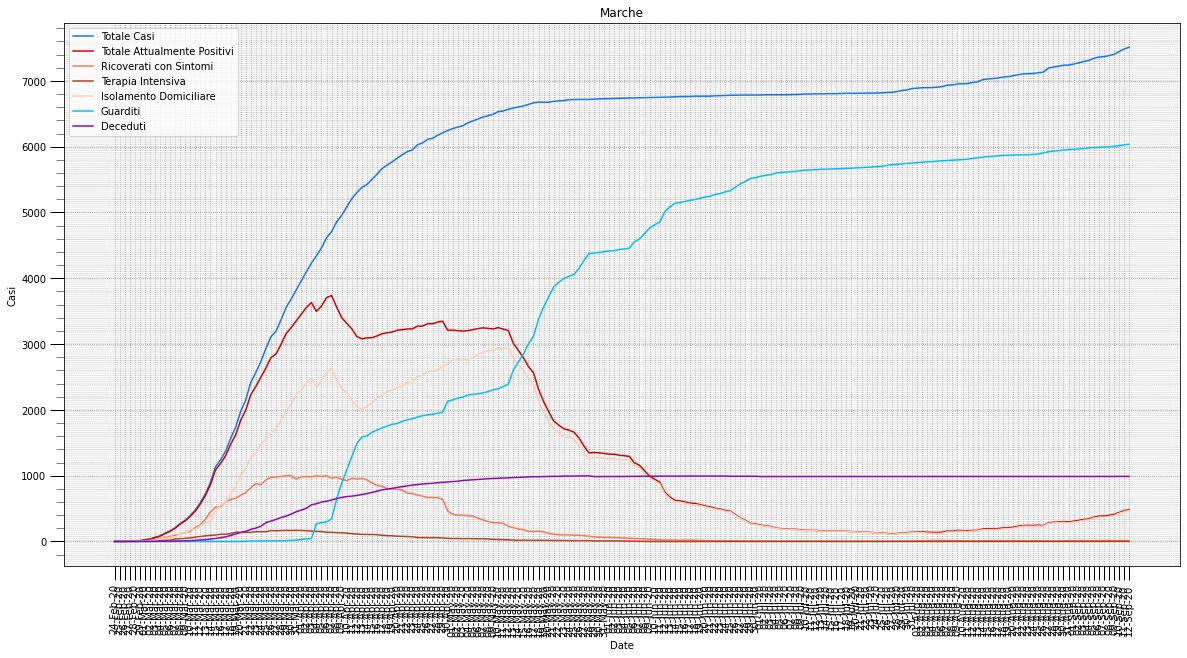

In [59]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

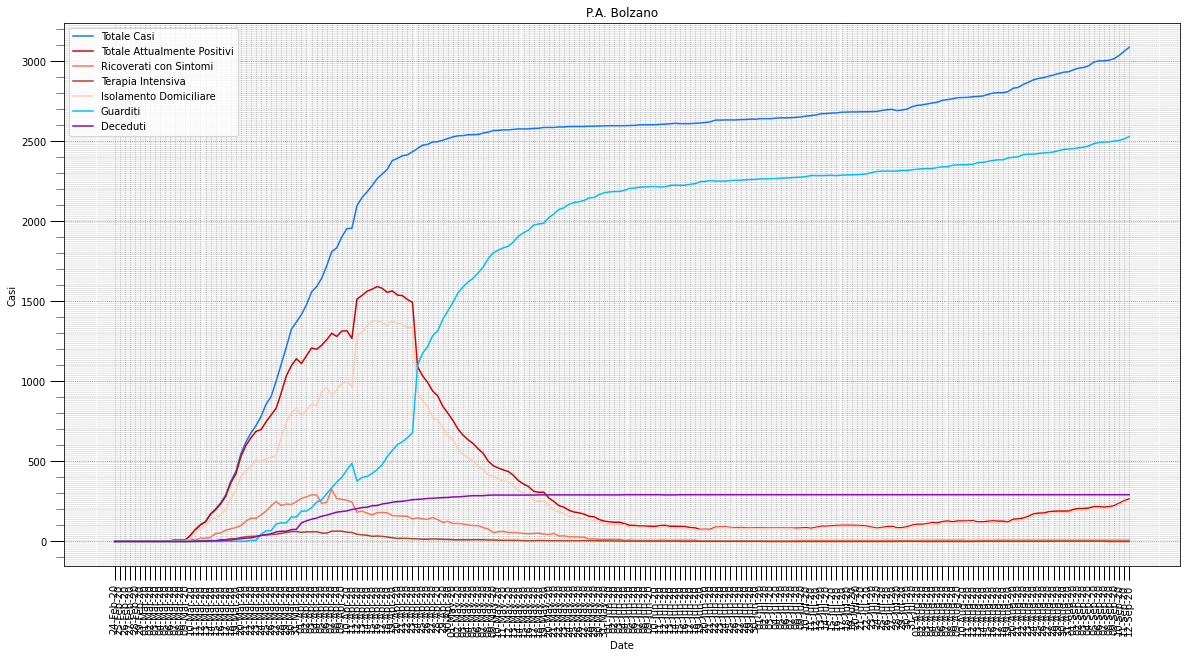

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

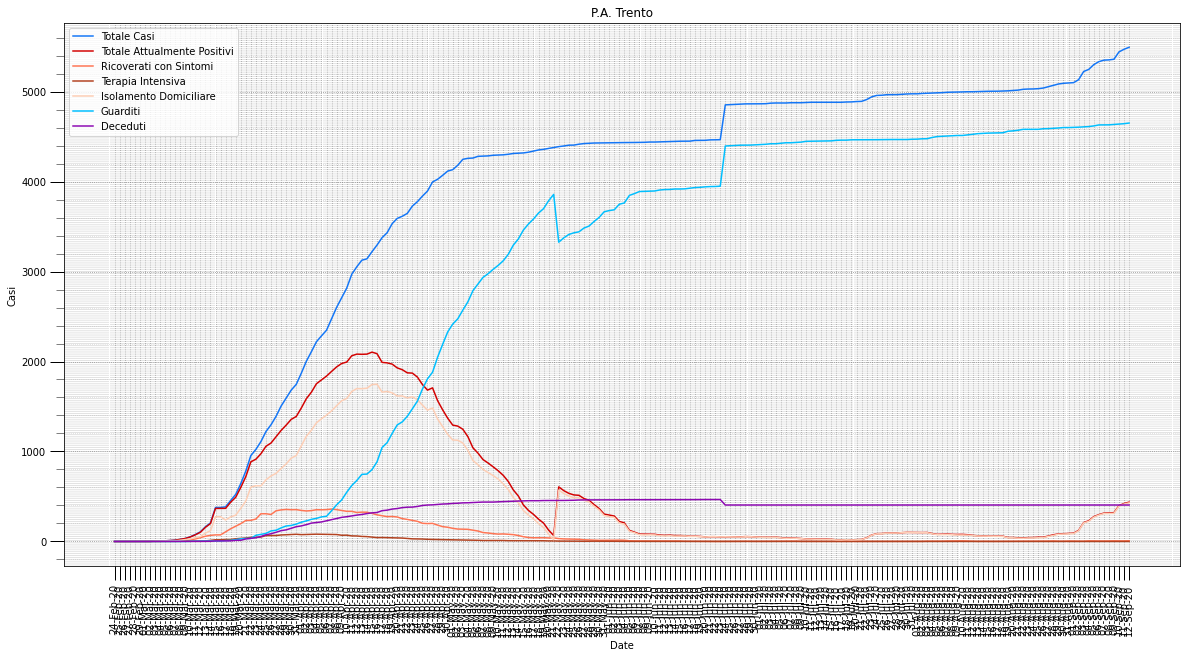

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

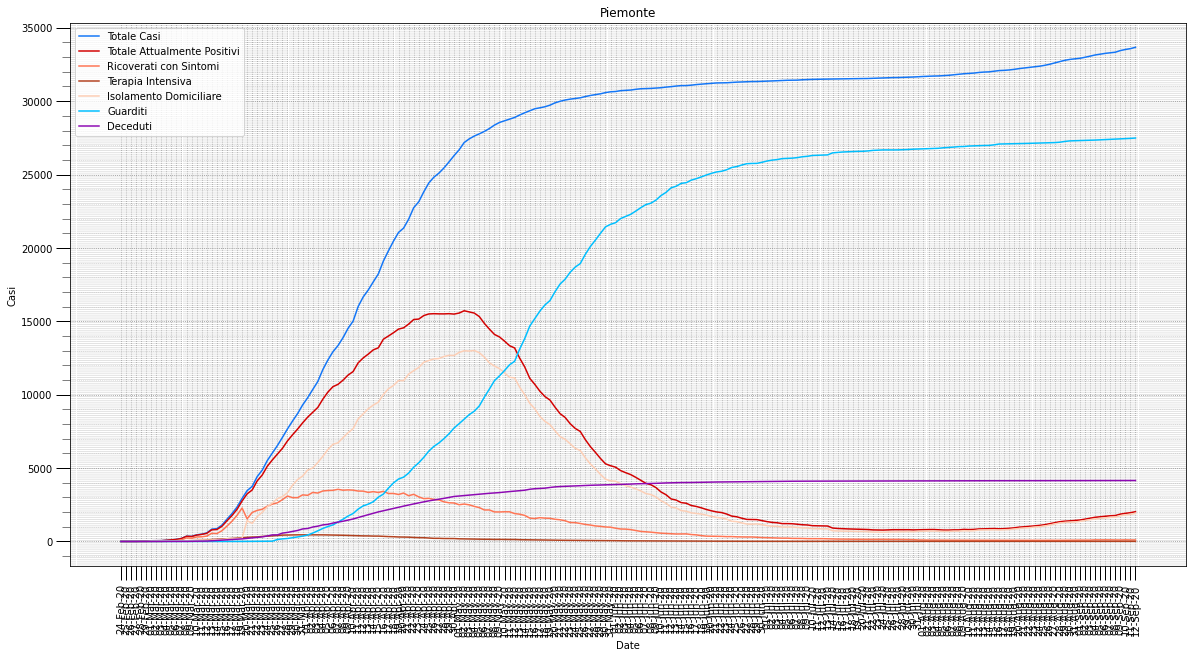

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

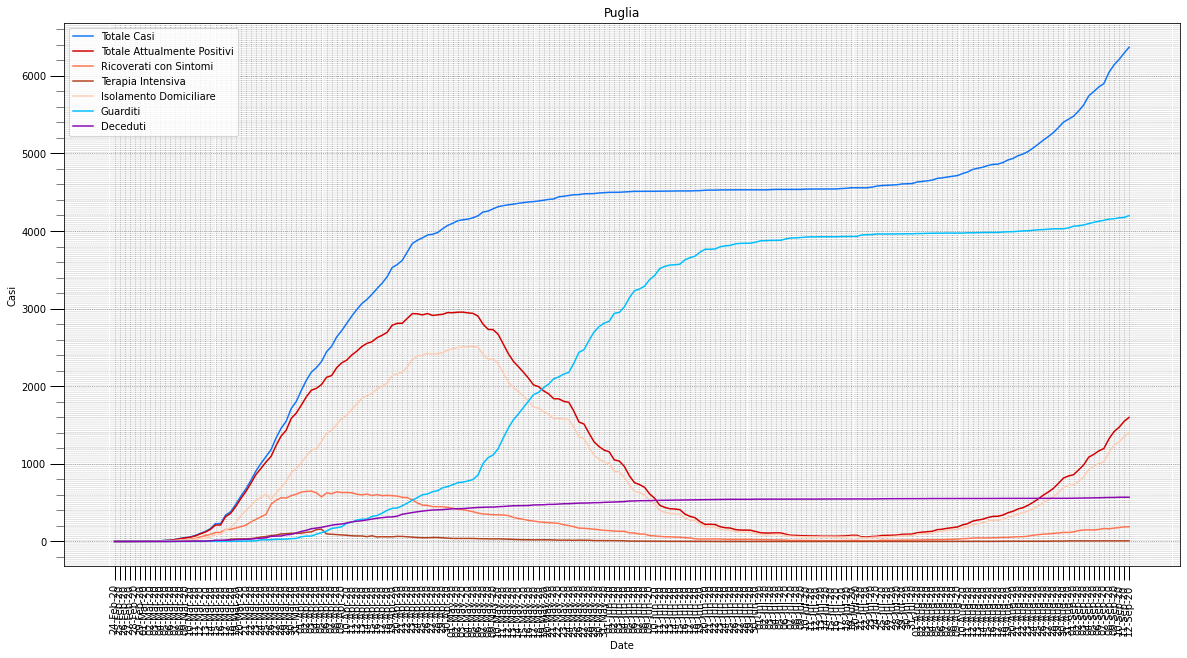

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

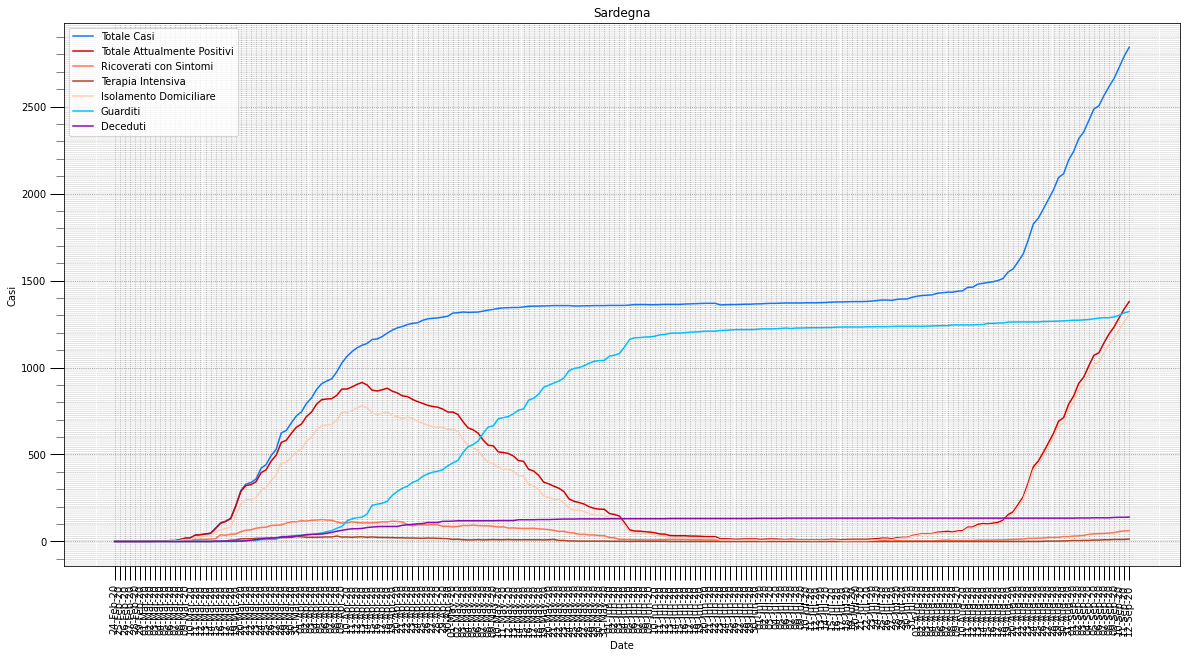

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

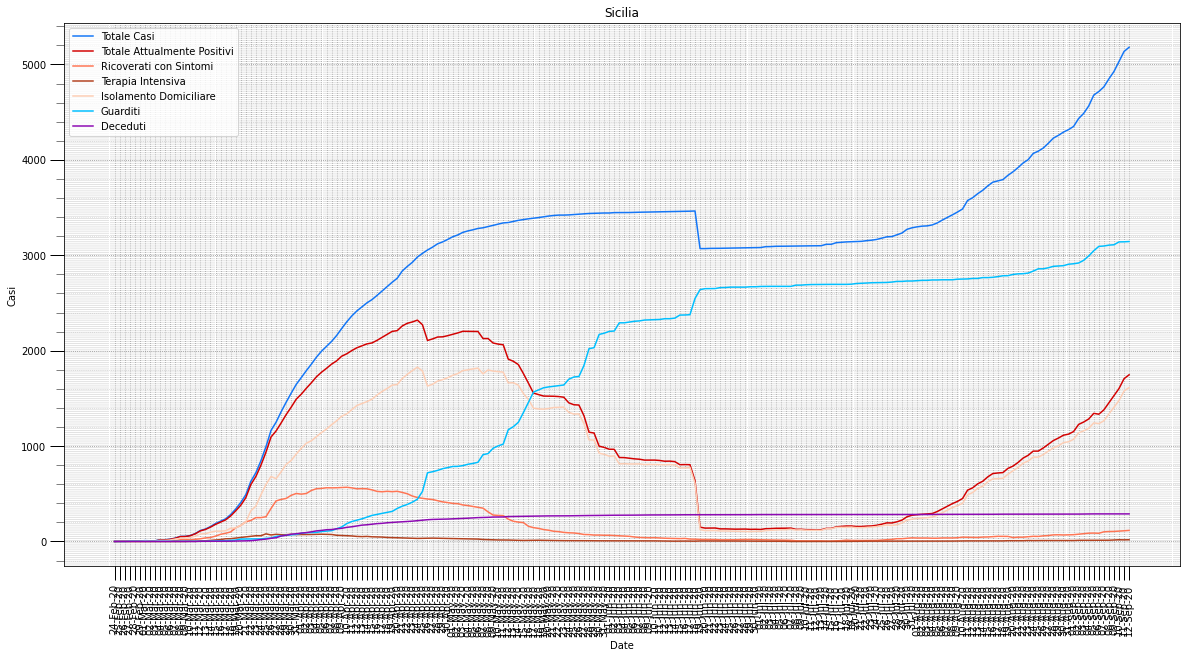

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

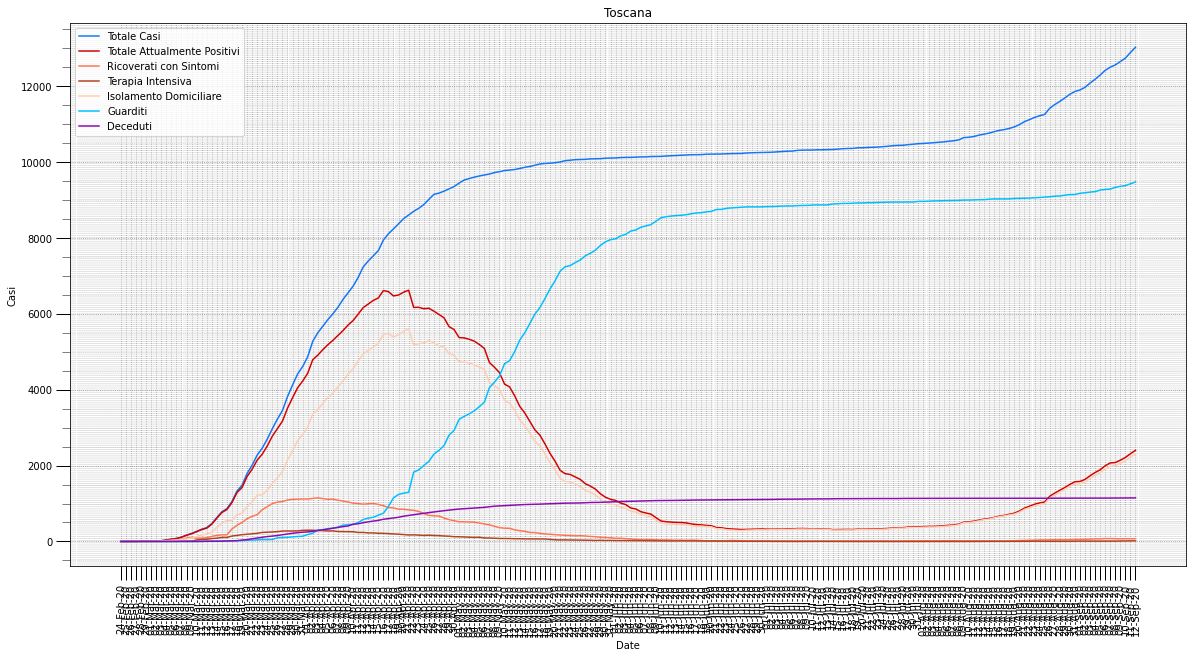

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

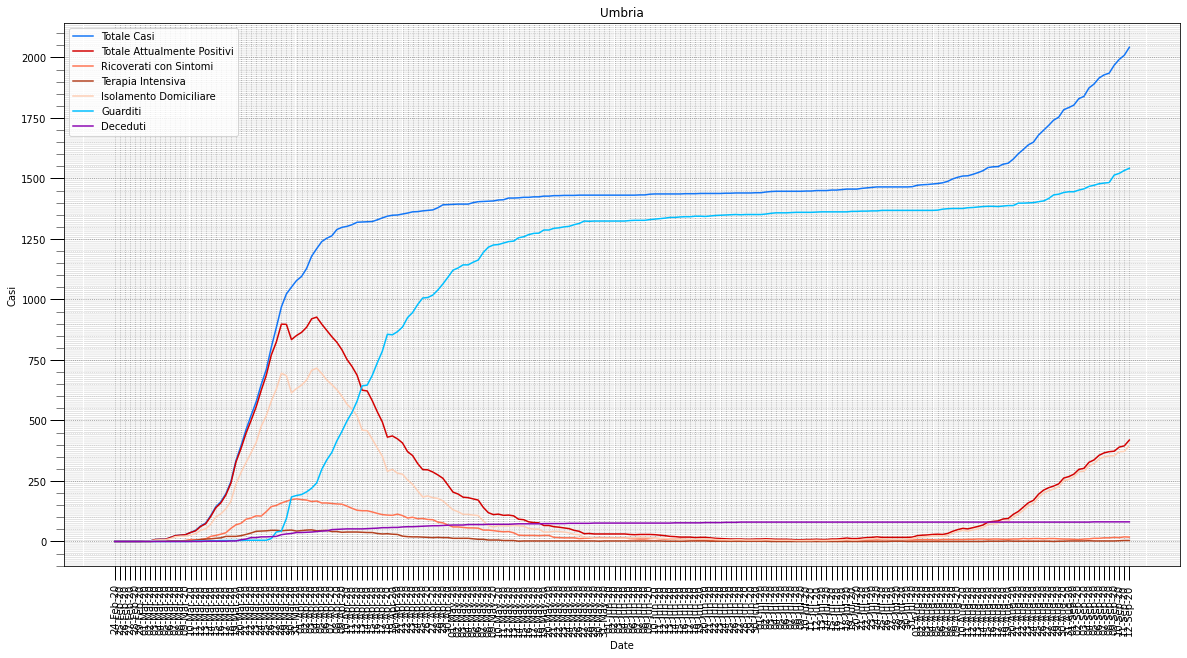

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

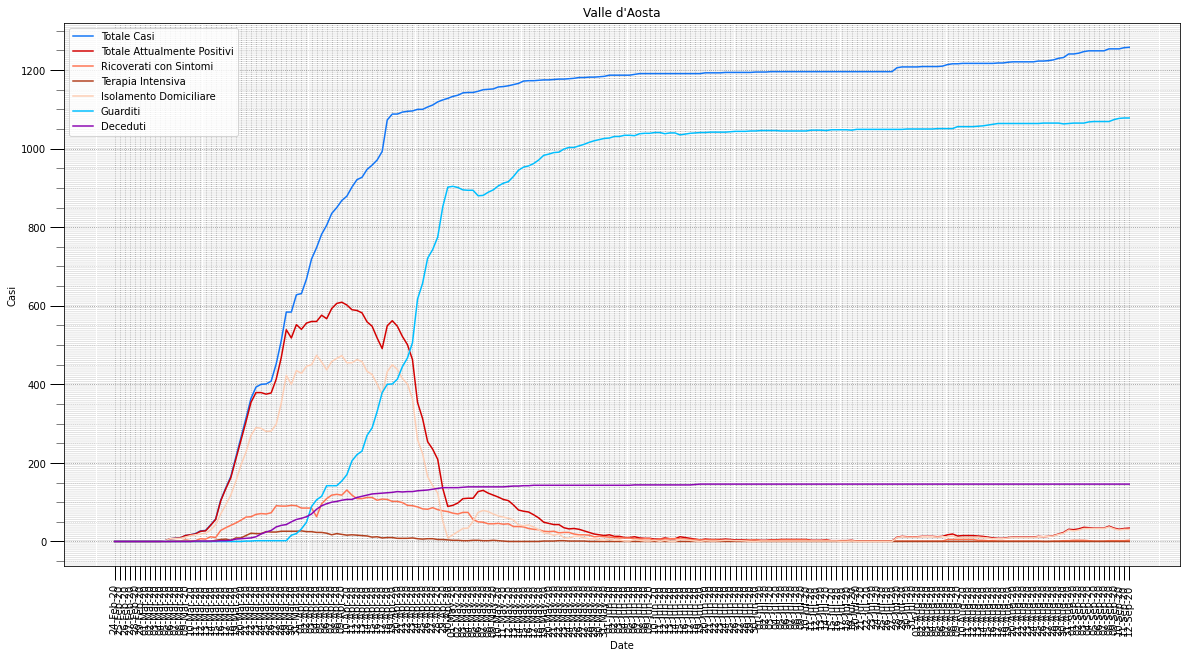

Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.9999999999992]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1106 ticks ([-10.0, ..., 210.999999999999

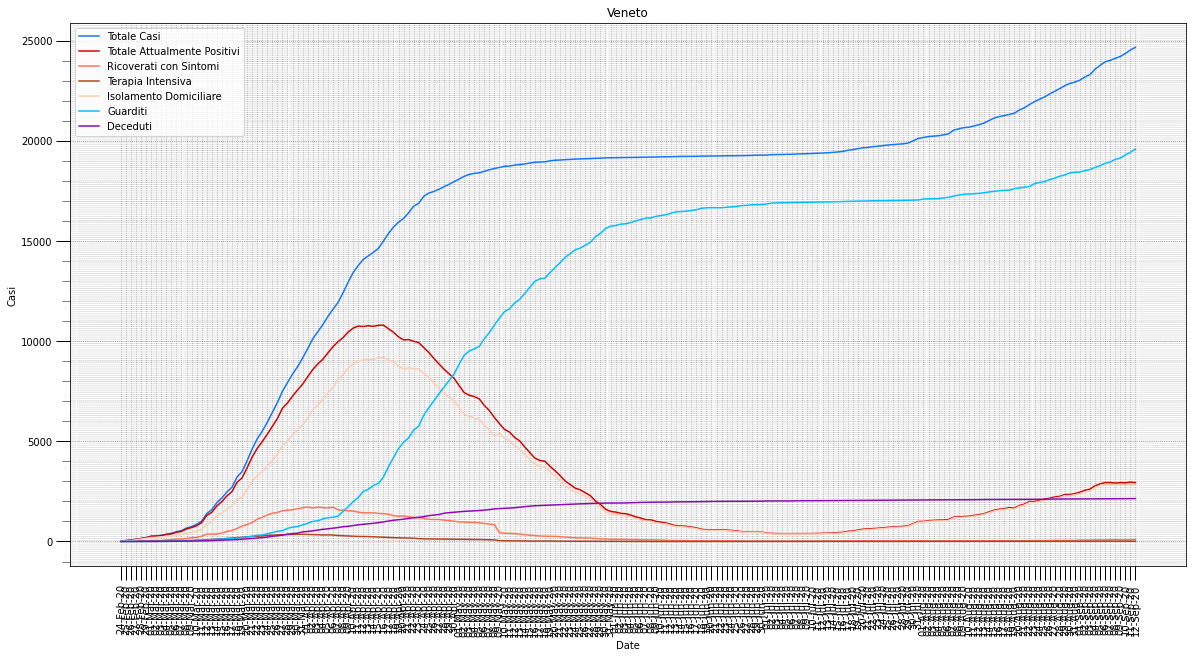

In [60]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)